In [86]:
import skimage
from skimage import io as skio
import skimage.metrics

import numpy as np
import matplotlib.pyplot as plt

import skimage.feature

640


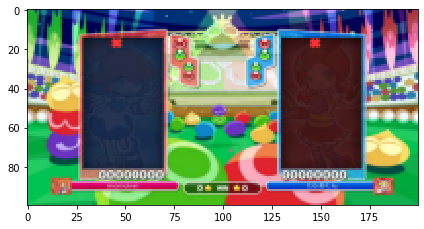

In [147]:
img1 = skio.imread('/mnt/vol/30fps-02/dst000153.jpg')
img2 = skio.imread('/mnt/vol/30fps-02/dst000154.jpg')
#img1 = skio.imread('/mnt/vol/30fps-02/dst000858.jpg')
#img2 = skio.imread('/mnt/vol/30fps-02/dst000859.jpg')
img_r = skimage.transform.resize(img1, (100,200))
skio.imshow(img_r)
print(img1.shape[1])

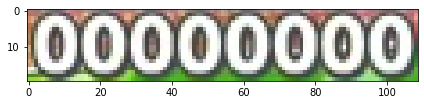

In [131]:
img1_gray = skimage.color.rgb2gray(img1[45:147,232:283])
img2_gray = skimage.color.rgb2gray(img2[45:147,232:283])
skio.imshow(img1[294:314, 116:225])

0.6171401945414448

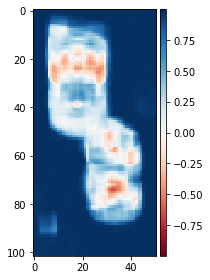

In [119]:
(score, diff) = skimage.metrics.structural_similarity(img1_gray, img2_gray, full=True)
skio.imshow(diff)
score

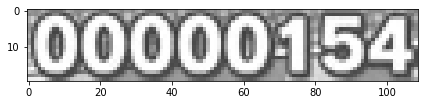

In [139]:
#import glob
#files = glob.glob('/mnt/vol/30fps-02/dst*.jpg')
#img = skimage.color.rgb2gray(skio.imread('/mnt/vol/30fps-02/dst000943.jpg'))
img = skimage.color.rgb2gray(skio.imread('/mnt/vol/30fps-02/dst000500.jpg'))
ximg = skimage.color.rgb2gray(skio.imread('/mnt/vol/x.png'))
skio.imshow(img[294:314, 116:225])

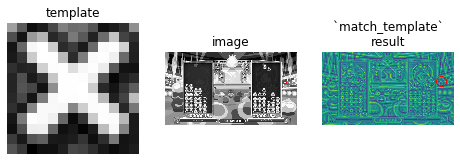

In [133]:
result = skimage.feature.match_template(img, ximg)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(ximg, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(img, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = ximg.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()


In [135]:
ij = np.unravel_index(np.argmax(result), result.shape)
print(ij)
print(result[ij])
print(np.max(result))

(138, 565)
0.6123692405092738
0.6123692405092738


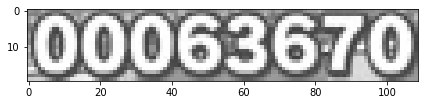

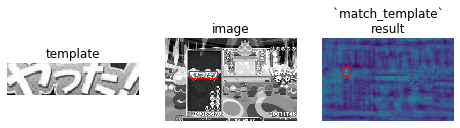

0.9181680082116626


In [138]:
img = skimage.color.rgb2gray(skio.imread('/mnt/vol/30fps-02/dst001788.jpg'))
yimg = skimage.color.rgb2gray(skio.imread('/mnt/vol/yatta.png'))
skio.imshow(img[294:314, 116:225])

result = skimage.feature.match_template(img, yimg)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig = plt.figure(figsize=(8, 3))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(yimg, cmap=plt.cm.gray)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(img, cmap=plt.cm.gray)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = yimg.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)

plt.show()
print(np.max(result))